# Import relevant packages

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
import warnings  as ws
ws.filterwarnings("ignore")

import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, SGDRegressor, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score

from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import PartialDependenceDisplay
import shap


# Loading the Data

In [2]:
df = pd.read_csv("Medicalpremium.csv")

df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [3]:
df.shape

(986, 11)

In [4]:
df.duplicated().sum()

0

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated(keep=False)
df.shape

(986, 11)

In [6]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [7]:
df.shape

(986, 11)

# EDA on the Data

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.000,41.745,13.963,18.000,30.000,42.000,53.000,66.000
Diabetes,986.000,0.420,0.494,0.000,0.000,0.000,1.000,1.000
BloodPressureProblems,986.000,0.469,0.499,0.000,0.000,0.000,1.000,1.000
AnyTransplants,986.000,0.056,0.230,0.000,0.000,0.000,0.000,1.000
AnyChronicDiseases,986.000,0.181,0.385,0.000,0.000,0.000,0.000,1.000
Height,986.000,168.183,10.098,145.000,161.000,168.000,176.000,188.000
Weight,986.000,76.950,14.265,51.000,67.000,75.000,87.000,132.000
KnownAllergies,986.000,0.215,0.411,0.000,0.000,0.000,0.000,1.000
HistoryOfCancerInFamily,986.000,0.118,0.322,0.000,0.000,0.000,0.000,1.000
NumberOfMajorSurgeries,986.000,0.667,0.749,0.000,0.000,1.000,1.000,3.000


In [9]:
cols = df.columns
cols

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [10]:
pr_lab=['Low','Basic','Average','High','SuperHigh']
df['PremiumLabel']=pr_bins=pd.cut(df['PremiumPrice'],bins=5,labels=pr_lab,precision=0)

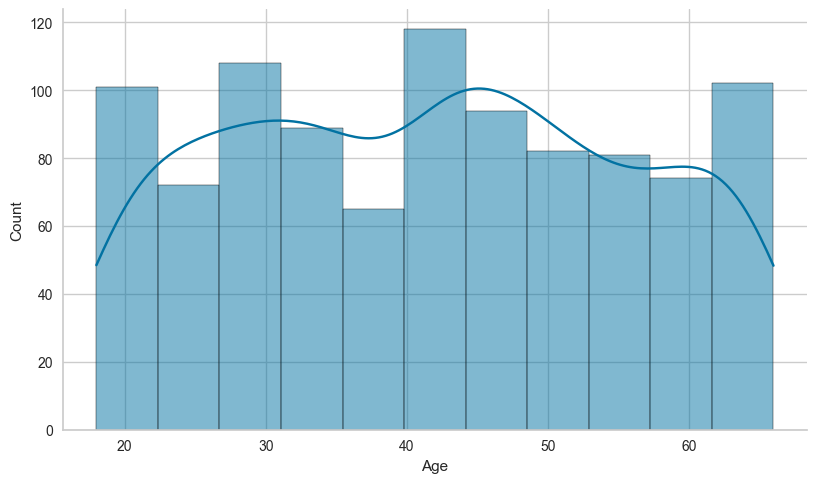

In [11]:
sns.displot(x='Age',data=df,aspect=10/6,kde=True)

Text(0.5, 1.0, 'Insurance Premium Price by Age')

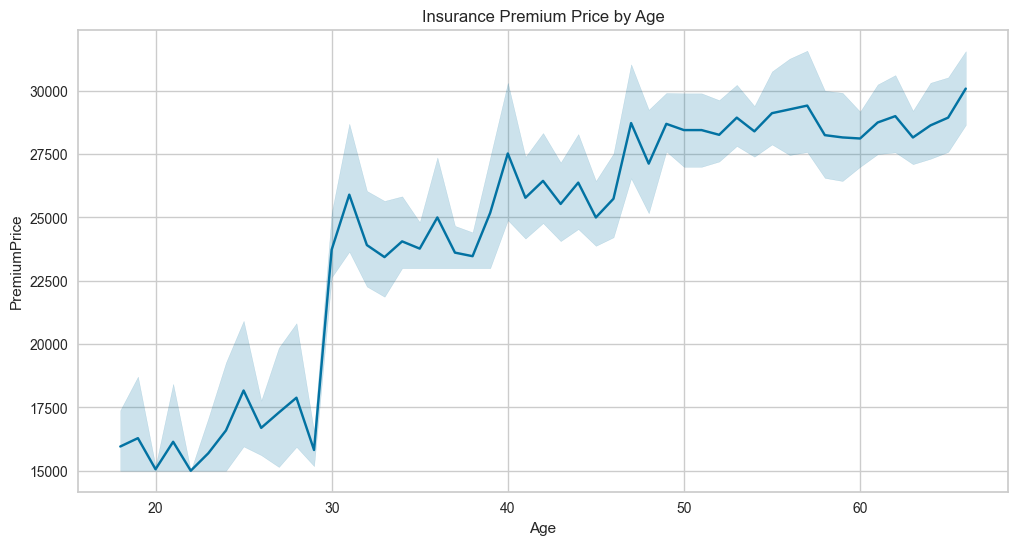

In [12]:
fig,ax=plt.subplots(figsize=(12,6))
sns.lineplot(x=df.Age,y=df.PremiumPrice).set_title('Insurance Premium Price by Age')

Text(0.5, 1.0, 'Distribution of the Insurance Premium Price')

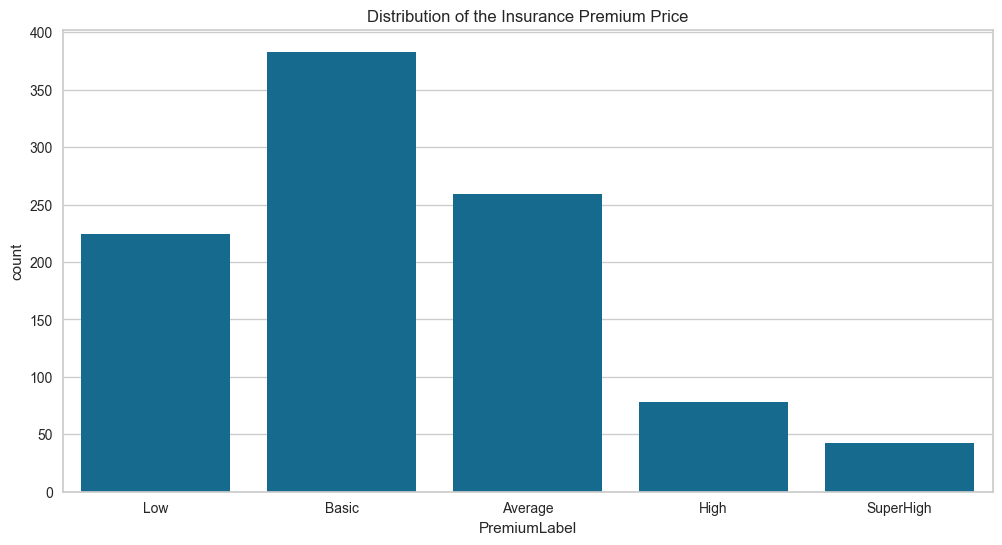

In [13]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='PremiumLabel', data=df,ax=ax).set_title('Distribution of the Insurance Premium Price')

In [14]:
df.groupby(['PremiumLabel','NumberOfMajorSurgeries'])['NumberOfMajorSurgeries'].count()

PremiumLabel  NumberOfMajorSurgeries
Low           0                         142
              1                          82
              2                           0
              3                           0
Basic         0                         226
              1                         156
              2                           1
              3                           0
Average       0                          67
              1                          59
              2                         117
              3                          16
High          0                          22
              1                          56
              2                           0
              3                           0
SuperHigh     0                          22
              1                          19
              2                           1
              3                           0
Name: NumberOfMajorSurgeries, dtype: int64

In [15]:
cols

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

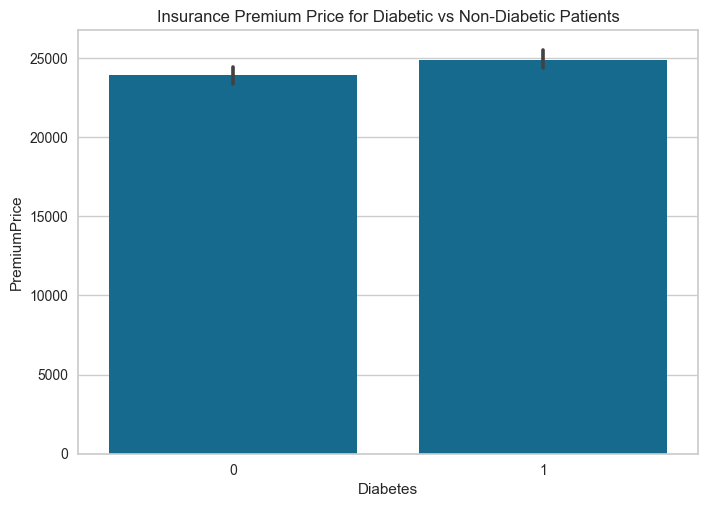

In [16]:
plot = sns.barplot(data=df, x="Diabetes", y= "PremiumPrice" ).set_title('Insurance Premium Price for Diabetic vs Non-Diabetic Patients')

Text(0.5, 0.98, 'Density plot for Diabetic vs Non-Diabetic Patients')

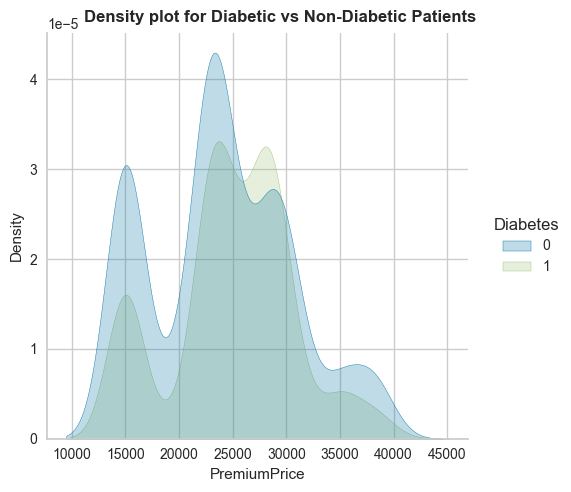

In [17]:
plot= sns.displot(df, x="PremiumPrice", hue="Diabetes", kind="kde", fill=True, )
plot.fig.suptitle(
    'Density plot for Diabetic vs Non-Diabetic Patients',
    fontsize=12,
    fontweight="bold"
)

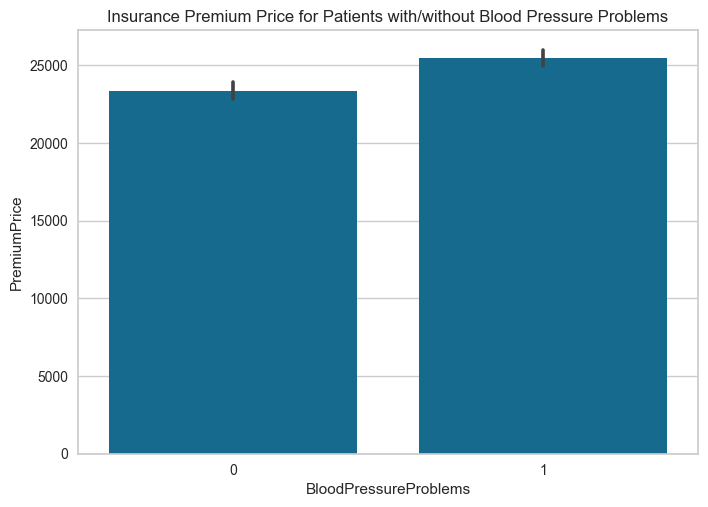

In [18]:
plot = sns.barplot(data=df, x="BloodPressureProblems", y= "PremiumPrice" ).set_title('Insurance Premium Price for Patients with/without Blood Pressure Problems')


Text(0.5, 0.98, 'Density plot for Patients with/without Blood Pressure Problems')

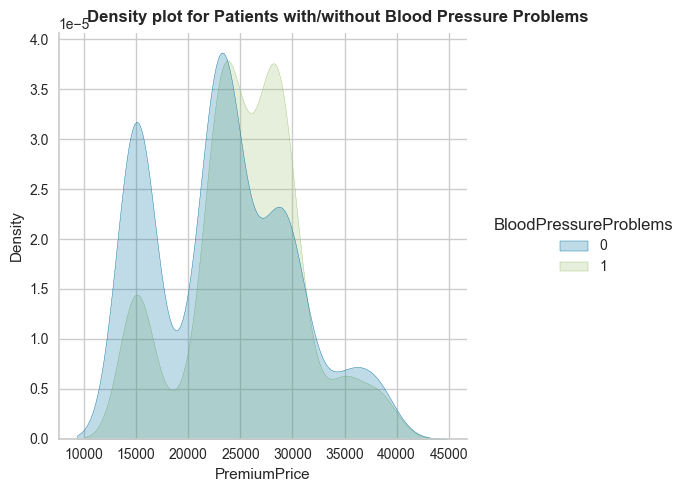

In [19]:
plot= sns.displot(df, x="PremiumPrice", hue="BloodPressureProblems", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Patients with/without Blood Pressure Problems',
                  fontsize=12,
                  fontweight="bold"
)

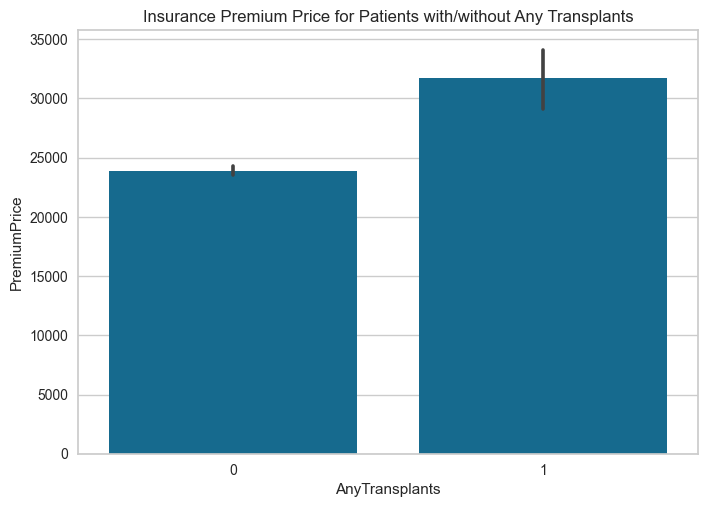

In [20]:
plot = sns.barplot(data=df, x="AnyTransplants", y= "PremiumPrice" ).set_title('Insurance Premium Price for Patients with/without Any Transplants')


Text(0.5, 0.98, 'Density plot for Patients with/without Any Transplants')

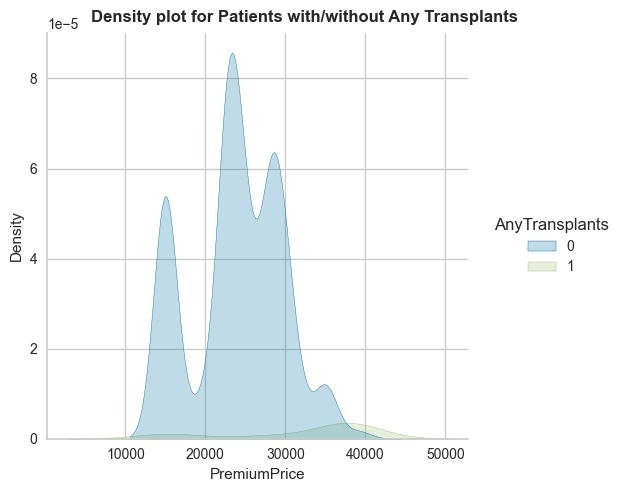

In [21]:
plot= sns.displot(df, x="PremiumPrice", hue="AnyTransplants", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Patients with/without Any Transplants',
                  fontsize=12,
                  fontweight="bold"
                 )

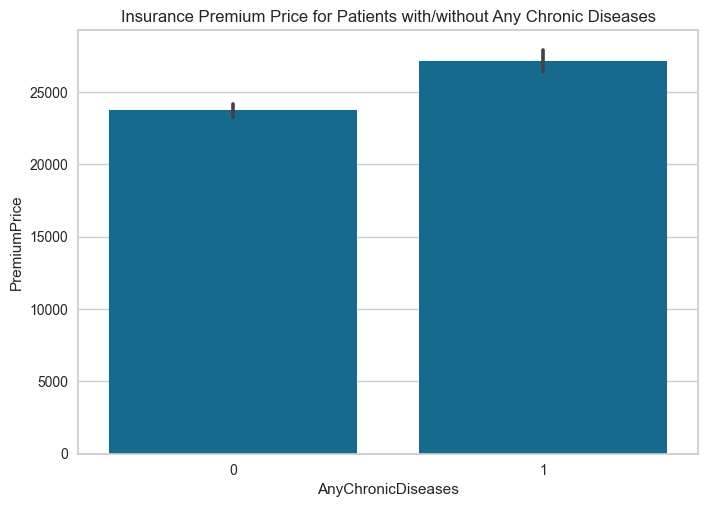

In [22]:
plot = sns.barplot(data=df, x="AnyChronicDiseases", y= "PremiumPrice" ).set_title('Insurance Premium Price for Patients with/without Any Chronic Diseases')

Text(0.5, 0.98, 'Density plot for Patients with/without Any Chronic Diseases')

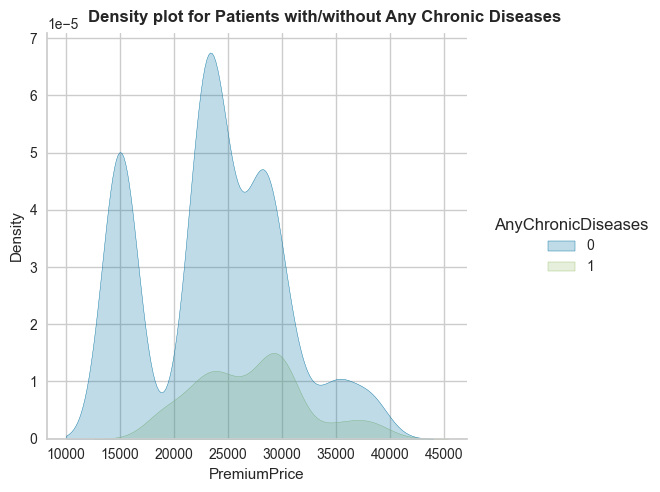

In [23]:
plot= sns.displot(df, x="PremiumPrice", hue="AnyChronicDiseases", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Patients with/without Any Chronic Diseases',
                  fontsize=12, fontweight="bold")

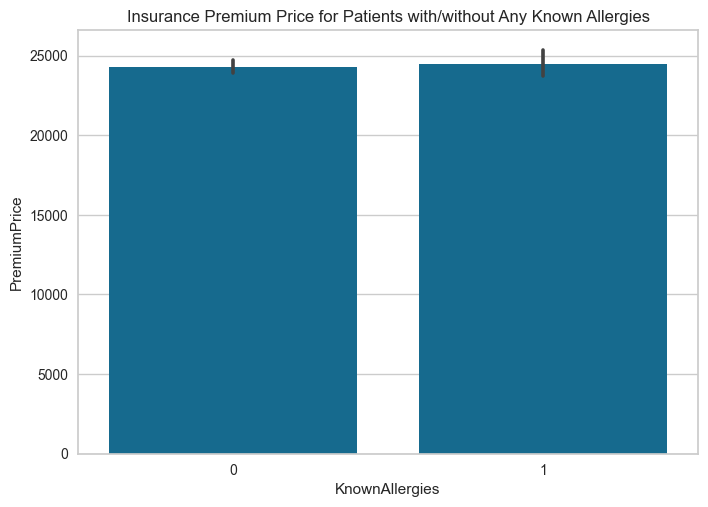

In [24]:
plot = sns.barplot(data=df, x="KnownAllergies", y= "PremiumPrice" ).set_title('Insurance Premium Price for Patients with/without Any Known Allergies')

Text(0.5, 0.98, 'Density plot for Patients with/without Any Known Allergies')

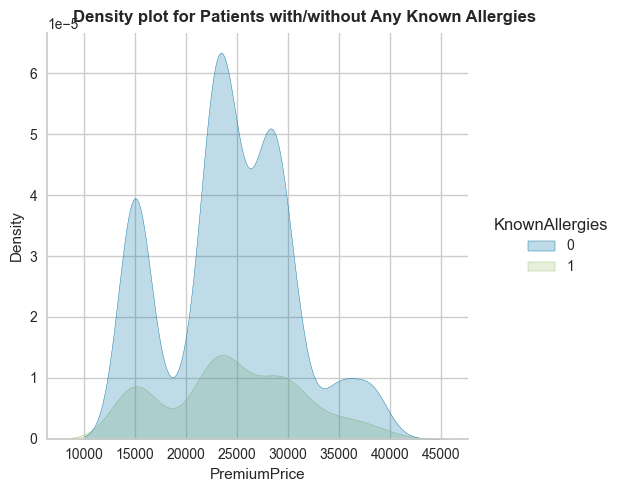

In [25]:
plot= sns.displot(df, x="PremiumPrice", hue="KnownAllergies", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Patients with/without Any Known Allergies',
                  fontsize=12, fontweight="bold")

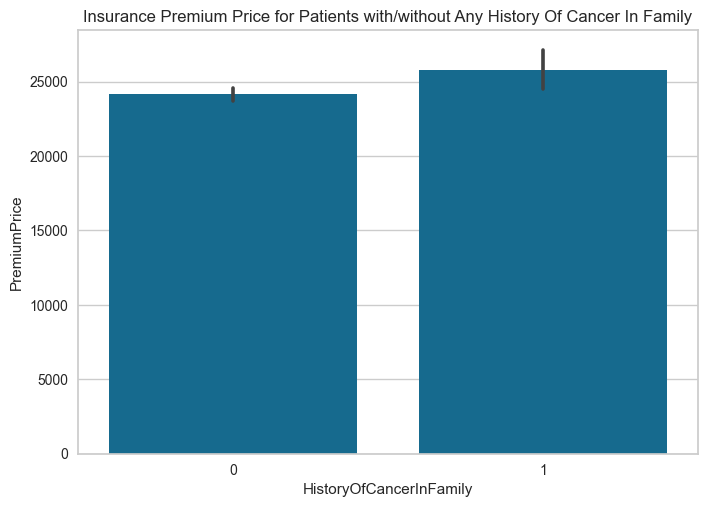

In [26]:
plot = sns.barplot(data=df, x="HistoryOfCancerInFamily", y= "PremiumPrice" ).set_title('Insurance Premium Price for Patients with/without Any History Of Cancer In Family')

Text(0.5, 0.98, 'Density plot for Patients with/without Any History Of Cancer In Family')

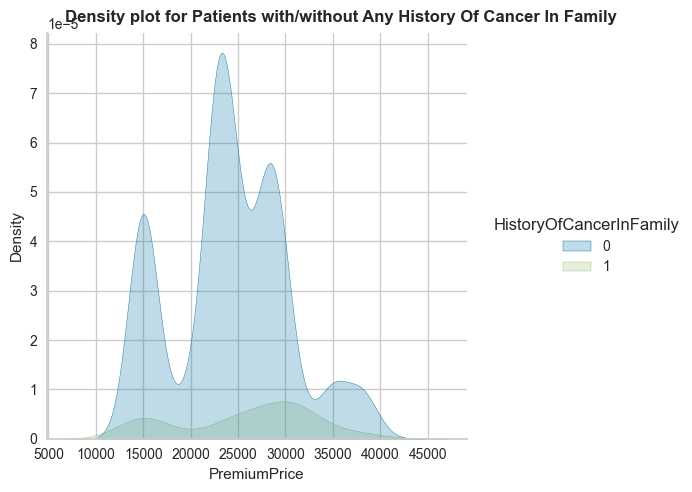

In [27]:
plot= sns.displot(df, x="PremiumPrice", hue="HistoryOfCancerInFamily", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Patients with/without Any History Of Cancer In Family',
                  fontsize=12, fontweight="bold")

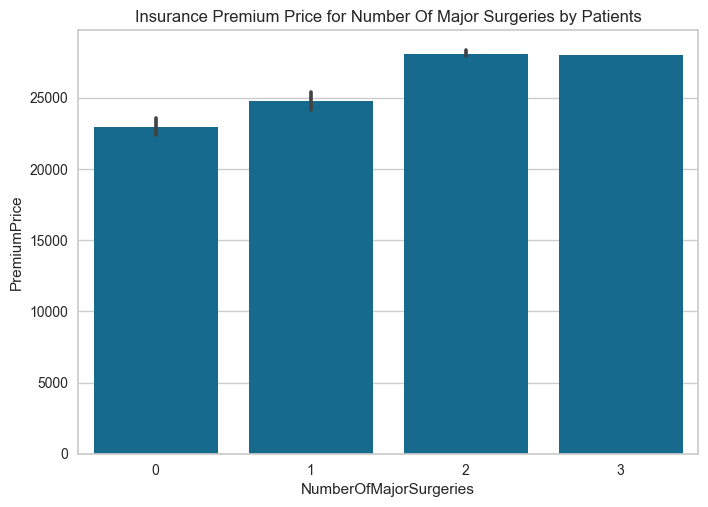

In [28]:
plot = sns.barplot(data=df, x="NumberOfMajorSurgeries", y= "PremiumPrice" ).set_title('Insurance Premium Price for Number Of Major Surgeries by Patients')

Text(0.5, 0.98, 'Density plot for Number Of Major Surgeries by Patients')

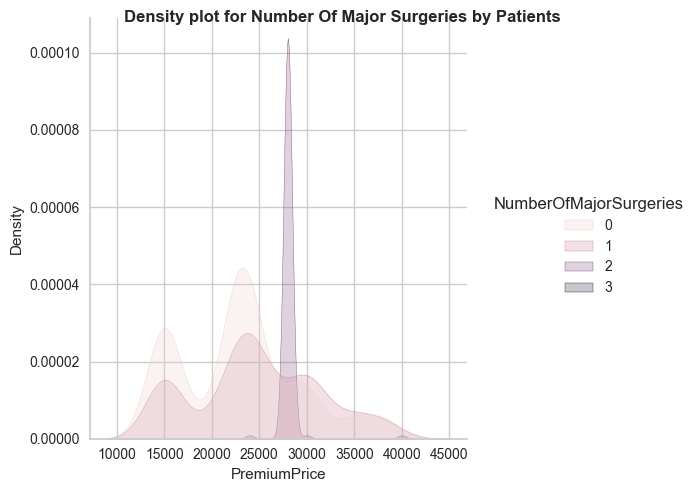

In [29]:
plot= sns.displot(df, x="PremiumPrice", hue="NumberOfMajorSurgeries", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Number Of Major Surgeries by Patients',
                  fontsize=12, fontweight="bold")

In [30]:
# Calculating BMI
w = df['Weight'];
h = df['Height'];

#bmi = 10000*(weight/(height*height));

df['BMI'] = 10000*(w/(h*h))

df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumLabel,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,Basic,23.725
1,60,1,0,0,0,180,73,0,0,0,29000,Average,22.531
2,36,1,1,0,0,158,59,0,0,1,23000,Basic,23.634
3,52,1,1,0,1,183,93,0,0,2,28000,Average,27.770
4,38,0,0,0,1,166,88,0,0,1,23000,Basic,31.935


In [31]:
df['BMI_Status'] = np.select(
    [
        df['BMI'] < 18.5,
        df['BMI'] >= 30,
        df['BMI'].between(18.5, 24.999999),
        df['BMI'].between(25, 29.9999999)
    ],
    ['Underweight', 'Obese', 'Normal', 'Overweight'],
    default='Unknown'
)

In [32]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumLabel,BMI,BMI_Status
0,45,0,0,0,0,155,57,0,0,0,25000,Basic,23.725,Normal
1,60,1,0,0,0,180,73,0,0,0,29000,Average,22.531,Normal
2,36,1,1,0,0,158,59,0,0,1,23000,Basic,23.634,Normal
3,52,1,1,0,1,183,93,0,0,2,28000,Average,27.770,Overweight
4,38,0,0,0,1,166,88,0,0,1,23000,Basic,31.935,Obese


In [33]:
df.groupby(['PremiumLabel','BMI_Status'])['BMI_Status'].count()

PremiumLabel  BMI_Status 
Low           Normal          71
              Obese           70
              Overweight      74
              Underweight      9
Basic         Normal         151
              Obese           88
              Overweight     120
              Underweight     24
Average       Normal          74
              Obese           80
              Overweight     100
              Underweight      5
High          Normal          13
              Obese           49
              Overweight      15
              Underweight      1
SuperHigh     Normal          10
              Obese           16
              Overweight      16
              Underweight      0
Name: BMI_Status, dtype: int64

<Axes: xlabel='PremiumLabel', ylabel='count'>

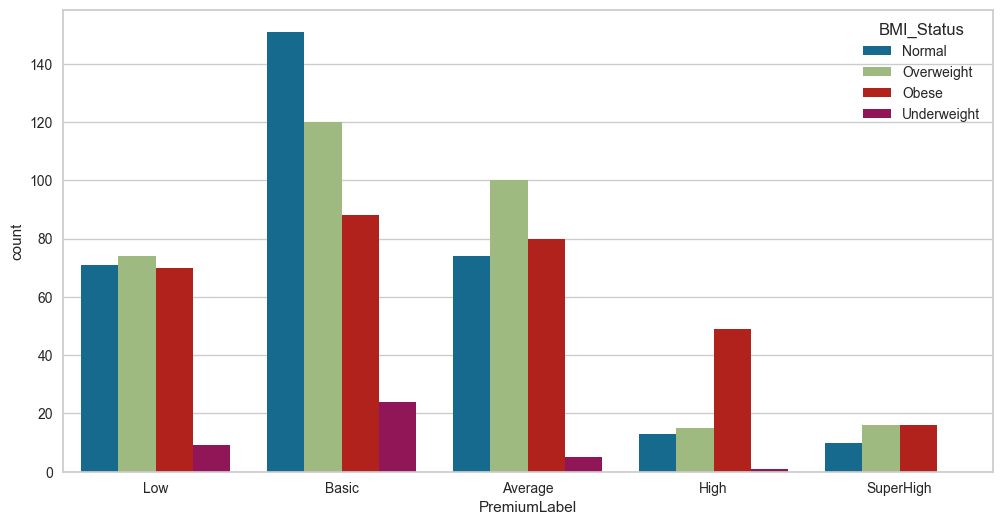

In [34]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='PremiumLabel',hue='BMI_Status', data=df,ax=ax)

Text(0.5, 1.0, 'Insurance Premium Price for Various BMI Status')

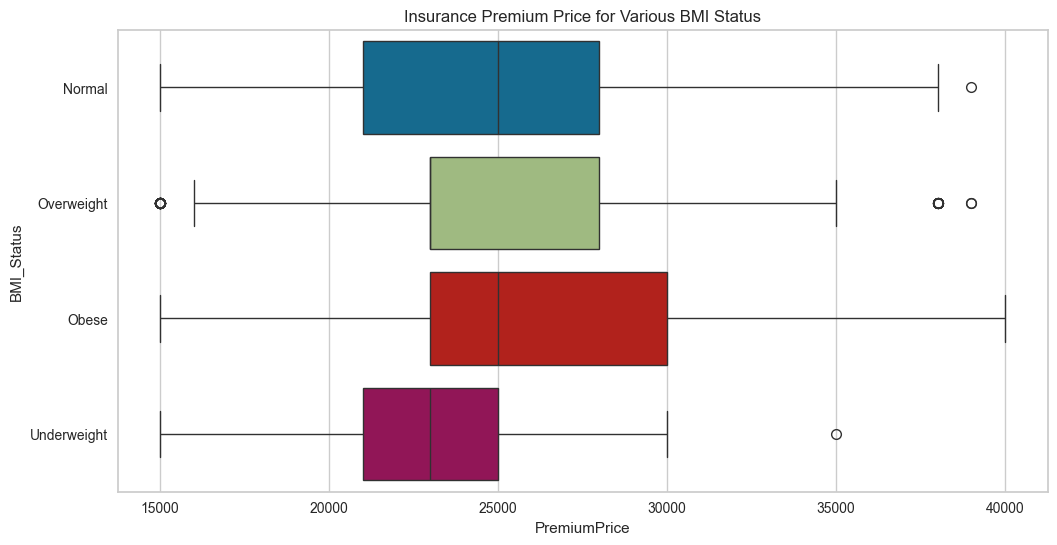

In [35]:
fig,ax=plt.subplots(figsize=(12,6))
sns.boxplot(data=df, x="PremiumPrice", y="BMI_Status", hue="BMI_Status", dodge=False).set_title('Insurance Premium Price for Various BMI Status')

<Axes: >

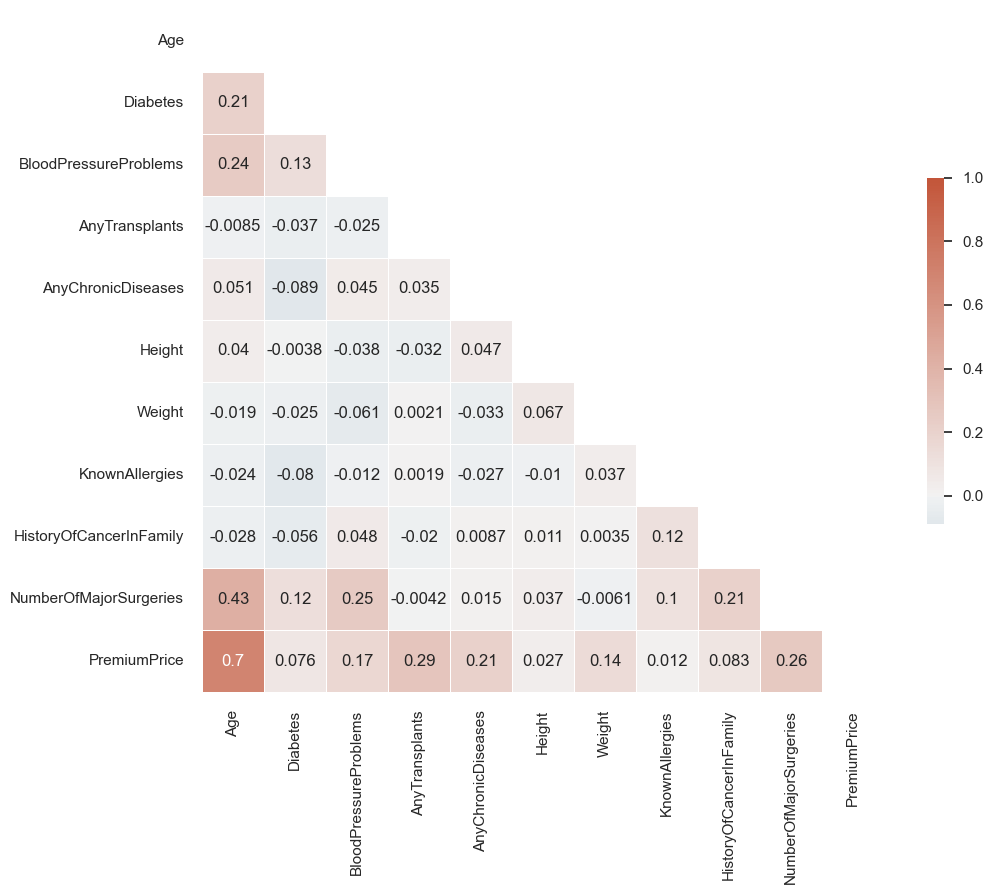

In [36]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = df
d = pd.DataFrame(data=rs,
                 columns=cols)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [37]:
df=pd.get_dummies(data=df,columns=['BMI_Status'])

In [38]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumLabel,BMI,BMI_Status_Normal,BMI_Status_Obese,BMI_Status_Overweight,BMI_Status_Underweight
0,45,0,0,0,0,155,57,0,0,0,25000,Basic,23.725,True,False,False,False
1,60,1,0,0,0,180,73,0,0,0,29000,Average,22.531,True,False,False,False
2,36,1,1,0,0,158,59,0,0,1,23000,Basic,23.634,True,False,False,False
3,52,1,1,0,1,183,93,0,0,2,28000,Average,27.770,False,False,True,False
4,38,0,0,0,1,166,88,0,0,1,23000,Basic,31.935,False,True,False,False


In [39]:
df.shape

(986, 17)

In [40]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'PremiumLabel', 'BMI', 'BMI_Status_Normal', 'BMI_Status_Obese',
       'BMI_Status_Overweight', 'BMI_Status_Underweight'],
      dtype='object')

# Building the ML model

In [41]:
   x = df.drop([
       'PremiumPrice', 'PremiumLabel', 'Height', 'Weight',
       'BMI_Status_Normal', 'BMI_Status_Obese', 'BMI_Status_Overweight',
       'BMI_Status_Underweight'
   ], axis=1)
   y = df['PremiumPrice']

In [42]:
x.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily',
       'NumberOfMajorSurgeries', 'BMI'],
      dtype='object')

### Data normalization

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xsc=sc.fit_transform(x)

In [44]:
xsc=pd.DataFrame(xsc,columns=x.columns)

In [45]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(xsc,y)
mi_scores = pd.Series(mi_scores, name="MI Scores",index=xsc.columns)
mi_scores = mi_scores.sort_values(ascending=False)
(mi_scores*100).head(15).index

Index(['Age', 'NumberOfMajorSurgeries', 'AnyChronicDiseases', 'AnyTransplants',
       'HistoryOfCancerInFamily', 'BMI', 'BloodPressureProblems',
       'KnownAllergies', 'Diabetes'],
      dtype='object')

In [46]:
fea=list((mi_scores*100).head(15).index)
xsc=xsc[fea]
xsc

,Age,NumberOfMajorSurgeries,AnyChronicDiseases,AnyTransplants,HistoryOfCancerInFamily,BMI,BloodPressureProblems,KnownAllergies,Diabetes
0,0.233,-0.891,-0.469,-0.243,-0.365,-0.636,-0.939,-0.523,-0.851
1,1.308,-0.891,-0.469,-0.243,-0.365,-0.839,-0.939,-0.523,1.175
2,-0.412,0.444,-0.469,-0.243,-0.365,-0.651,1.065,-0.523,1.175
3,0.735,1.780,2.131,-0.243,-0.365,0.053,1.065,-0.523,1.175
4,-0.268,0.444,2.131,-0.243,-0.365,0.761,-0.939,-0.523,-0.851
...,...,...,...,...,...,...,...,...,...
981,-1.701,-0.891,-0.469,-0.243,-0.365,-0.681,-0.939,-0.523,-0.851
982,1.595,3.115,-0.469,-0.243,-0.365,0.416,1.065,-0.523,1.175
983,1.021,0.444,-0.469,-0.243,-0.365,0.356,1.065,-0.523,-0.851
984,0.377,0.444,-0.469,-0.243,-0.365,0.303,1.065,1.911,1.175


In [47]:
y.shape

(986,)

### Split train

In [48]:
#X=df.drop(['PremiumPrice'],axis=1)
#Y=df[['PremiumPrice']]
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
    xtrain,xtest,ytrain,ytest=train_test_split(xsc, y, random_state=i, test_size=0.25)
    lrmodel=LinearRegression()
    lrmodel.fit(xtrain,ytrain)
    l1.append(lrmodel.score(xtrain,ytrain))
    l2.append(lrmodel.score(xtest,ytest))
    cvs=(cross_val_score(lrmodel,xsc,y,cv=5,)).mean()
    l3.append(cvs)
    df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
df1


,train acc,test acc,cvs
0,0.637,0.628,0.626
1,0.611,0.709,0.626
2,0.612,0.685,0.626
3,0.619,0.678,0.626
4,0.664,0.539,0.626
5,0.612,0.693,0.626
6,0.624,0.665,0.626
7,0.625,0.663,0.626
8,0.620,0.675,0.626
9,0.675,0.502,0.626


In [49]:
xtrain,xtest,ytrain,ytest=train_test_split(xsc,y,test_size=0.25,random_state=41)

# RF Model

In [50]:
import time
import psutil
from sklearn.model_selection import GridSearchCV

# Record the start time
start_time = time.time()

# Function to get memory usage
def get_memory_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    return memory_info.rss / (1024 * 1024)  # Convert to megabytes

# Record memory usage before running your code
start_memory = get_memory_usage()

# === Baseline RF ===
rfmodel0 = RandomForestRegressor(random_state=41)
rfmodel0.fit(xtrain, ytrain)
ypredtrain2 = rfmodel0.predict(xtrain)
ypredtest2 = rfmodel0.predict(xtest)
print(r2_score(ytrain, ypredtrain2))
print(r2_score(ytest, ypredtest2))
print(cross_val_score(rfmodel0, xsc, y, cv=5).mean())

# === GridSearchCV ===
estimator = RandomForestRegressor(random_state=41)
param_grid = {'n_estimators': [60, 220, 40]}
grid1 = GridSearchCV(estimator, param_grid, scoring="r2", cv=5)
grid1.fit(xtrain, ytrain)
print(grid1.best_params_)

# Use tuned model
rfmodel = grid1
rfmodel.fit(xtrain, ytrain)

ypredtrain2 = rfmodel.predict(xtrain)
ypredtest2 = rfmodel.predict(xtest)
print(r2_score(ytrain, ypredtrain2))
print(r2_score(ytest, ypredtest2))
print(cross_val_score(rfmodel, xsc, y, cv=5).mean())

# === Metrics ===
acc_RF_Train = r2_score(ytrain, ypredtrain2)
print('R^2 Train:', acc_RF_Train)

acc_RF_Test = r2_score(ytest, ypredtest2)
print('R^2 Test:', acc_RF_Test)

acc_RF_CV = cross_val_score(rfmodel, xsc, y, cv=5).mean()
print('R^2 CV:', acc_RF_CV)

MAE_RF_Test = metrics.mean_absolute_error(ytest, ypredtest2)
print('MAE:', MAE_RF_Test)

MSE_RF_Test = metrics.mean_squared_error(ytest, ypredtest2)
print('MSE:', MSE_RF_Test)

RMSE_RF_Test = np.sqrt(metrics.mean_squared_error(ytest, ypredtest2))
print('RMSE:', RMSE_RF_Test)

MAPE_RF_Test = metrics.mean_absolute_percentage_error(ytest, ypredtest2)
print('MAPE:', MAPE_RF_Test)

# === End timing & memory ===
end_time = time.time()
end_memory = get_memory_usage()

RF_elapsed_time = end_time - start_time
RF_memory_used = max(0, end_memory - start_memory)c

print(f"Elapsed Time: {RF_elapsed_time} seconds")
print(f"Memory Used: {RF_memory_used} MB")

# === Inference time measurement ===
infer_start = time.time()
_ = rfmodel.predict(xtest)
infer_end = time.time()

RF_inference_time = infer_end - infer_start
RF_infer_per_sample = (RF_inference_time / len(xtest)) * 1000  # ms/sample

print(f"Inference Time   : {RF_inference_time:.4f} sec")
print(f"Per Sample Time  : {RF_infer_per_sample:.4f} ms")

0.9556972142649472
0.8451890735168895
0.7324450458109657
{'n_estimators': 220}
0.9580343674153595
0.8412223016960438
0.7343538469233943
R^2 Train: 0.9580343674153595
R^2 Test: 0.8412223016960438
R^2 CV: 0.7343538469233943
MAE: 1378.4320942215677
MSE: 5843760.497875329
RMSE: 2417.3871220545807
MAPE: 0.058150766715365336
Elapsed Time: 63.273585081100464 seconds
Memory Used: 0 MB
Inference Time   : 0.0314 sec
Per Sample Time  : 0.1271 ms


## Learning Curve for RF model

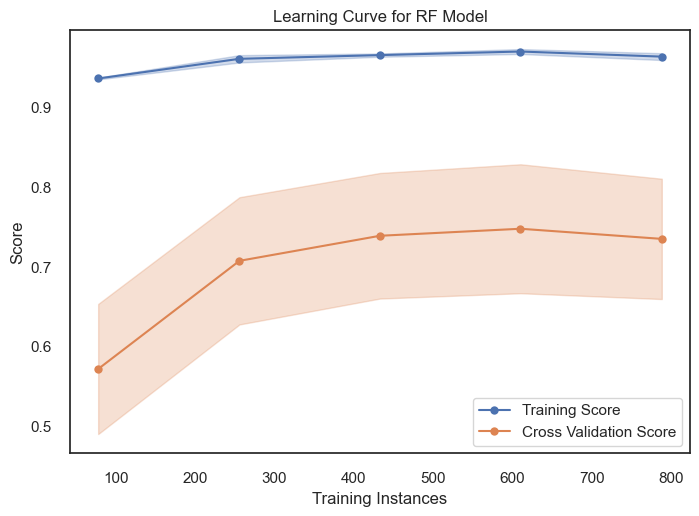

<Axes: title={'center': 'Learning Curve for RF Model'}, xlabel='Training Instances', ylabel='Score'>

In [51]:
from yellowbrick.model_selection import learning_curve


visualizer = learning_curve(rfmodel,xsc,y,cv=5, scoring='r2', title="Learning Curve for RF Model")

visualizer.show()

## Prediction error plot (yellowbrick) for RF model

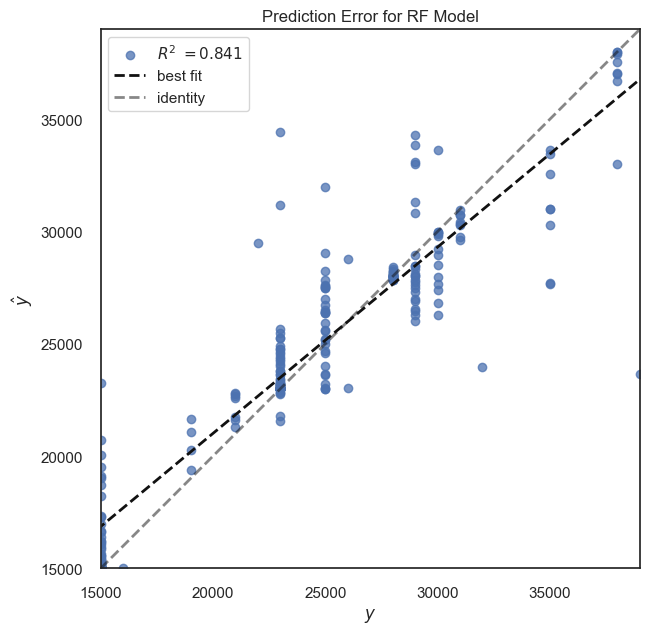

In [52]:
fig, ax = plt.subplots(figsize=(10, 7))
_ = prediction_error(estimator=rfmodel,
                     is_fitted=True,
                     ax=ax,
                     X_train=xtrain,
                     y_train=ytrain,
                     X_test=xtest,
                     y_test=ytest,
                     title="Prediction Error for RF Model")

## SHAP Analysis for RF model

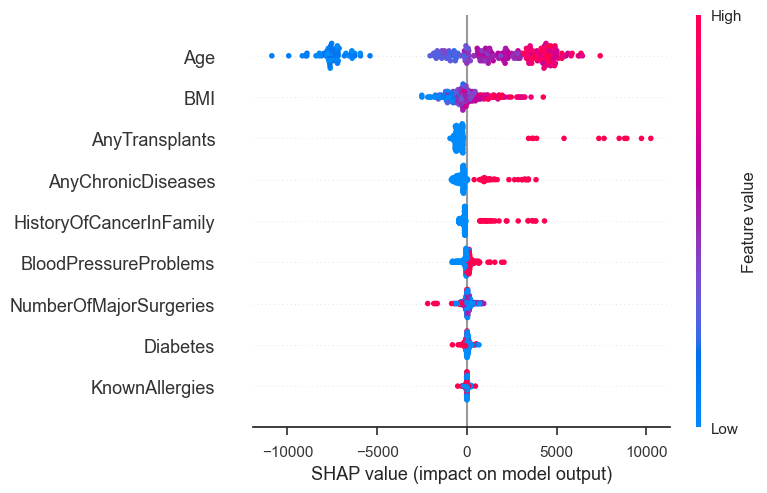

In [53]:
# Shap analysis for RF model

explainer1 = shap.TreeExplainer(rfmodel0)
RF_shap_values = explainer1.shap_values(xtest)
shap.summary_plot(RF_shap_values, xtest)

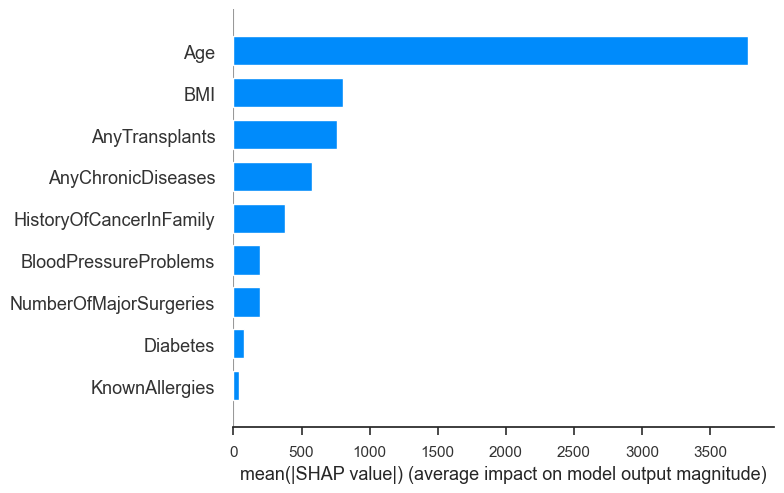

In [54]:
shap.summary_plot(RF_shap_values, xtest, plot_type="bar")

# GBM Model

In [55]:
import time
import psutil

# Record the start time
start_time = time.time()

# Function to get memory usage
def get_memory_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    return memory_info.rss / (1024 * 1024)  # Convert to MB

# Record memory usage before running your code
start_memory = get_memory_usage()

# === Baseline GBM ===
gbmodel0 = GradientBoostingRegressor()
gbmodel0.fit(xtrain, ytrain)
ypredtrain3 = gbmodel0.predict(xtrain)
ypredtest3 = gbmodel0.predict(xtest)
print(r2_score(ytrain, ypredtrain3))
print(r2_score(ytest, ypredtest3))
print(cross_val_score(gbmodel0, xsc, y, cv=5).mean())

# === GridSearchCV ===
estimator = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [10, 15, 19, 20, 21, 50, 100],
    'learning_rate': [0.1, 0.19, 0.2, 0.21, 0.8, 1]
}
grid2 = GridSearchCV(estimator, param_grid, scoring="r2", cv=5)
grid2.fit(xtrain, ytrain)
print(grid2.best_params_)

# Use tuned model
gbmodel = grid2
gbmodel.fit(xtrain, ytrain)

ypredtrain3 = gbmodel.predict(xtrain)
ypredtest3 = gbmodel.predict(xtest)

# === Metrics ===
acc_GBM_Train = r2_score(ytrain, ypredtrain3)
print('R^2 Train:', acc_GBM_Train)

acc_GBM_Test = r2_score(ytest, ypredtest3)
print('R^2 Test:', acc_GBM_Test)

acc_GBM_CV = cross_val_score(gbmodel, xsc, y, cv=5).mean()
print('R^2 CV:', acc_GBM_CV)

MAE_GBM_Test = metrics.mean_absolute_error(ytest, ypredtest3)
print('MAE:', MAE_GBM_Test)

MSE_GBM_Test = metrics.mean_squared_error(ytest, ypredtest3)
print('MSE:', MSE_GBM_Test)

RMSE_GBM_Test = np.sqrt(metrics.mean_squared_error(ytest, ypredtest3))
print('RMSE:', RMSE_GBM_Test)

MAPE_GBM_Test = metrics.mean_absolute_percentage_error(ytest, ypredtest3)
print('MAPE:', MAPE_GBM_Test)

# === End timing & memory ===
end_time = time.time()
end_memory = get_memory_usage()

GBM_elapsed_time = end_time - start_time
GBM_memory_used = max(0, end_memory - start_memory)

print(f"Elapsed Time: {GBM_elapsed_time} seconds")
print(f"Memory Used: {GBM_memory_used} MB")

# === Inference time measurement ===
infer_start = time.time()
_ = gbmodel.predict(xtest)
infer_end = time.time()

GBM_inference_time = infer_end - infer_start
GBM_infer_per_sample = (GBM_inference_time / len(xtest)) * 1000  # ms/sample

print(f"Inference Time   : {GBM_inference_time:.6f} sec")
print(f"Per Sample Time  : {GBM_infer_per_sample:.6f} ms")

0.8635682469956296
0.8441533265174462
0.7259810272892727
{'learning_rate': 0.19, 'n_estimators': 20}
R^2 Train: 0.7949199422986154
R^2 Test: 0.8450395028347657
R^2 CV: 0.7258663748383772
MAE: 1741.1987776705644
MSE: 5703269.676650522
RMSE: 2388.1519375137173
MAPE: 0.07305477817880449
Elapsed Time: 82.70956468582153 seconds
Memory Used: 0 MB
Inference Time   : 0.0000 sec
Per Sample Time  : 0.0000 ms


## Learning Curve for GBM model

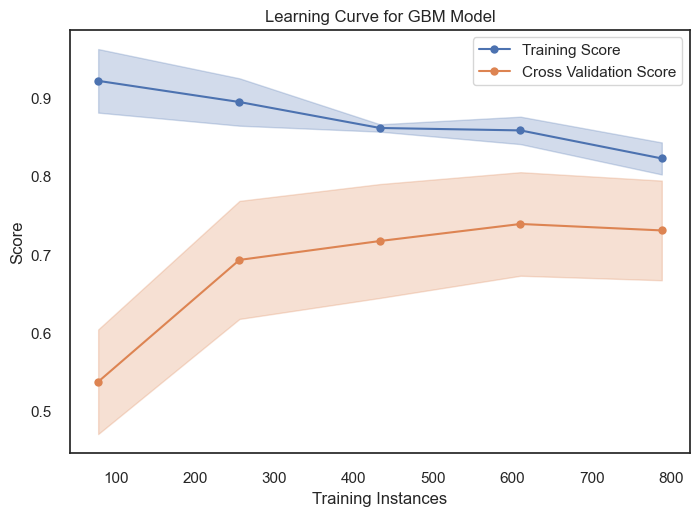

<Axes: title={'center': 'Learning Curve for GBM Model'}, xlabel='Training Instances', ylabel='Score'>

In [56]:
from yellowbrick.model_selection import learning_curve


visualizer = learning_curve(gbmodel,xsc,y,cv=5, scoring='r2', title="Learning Curve for GBM Model")

visualizer.show()

## Prediction error plot (yellowbrick) for GBM model

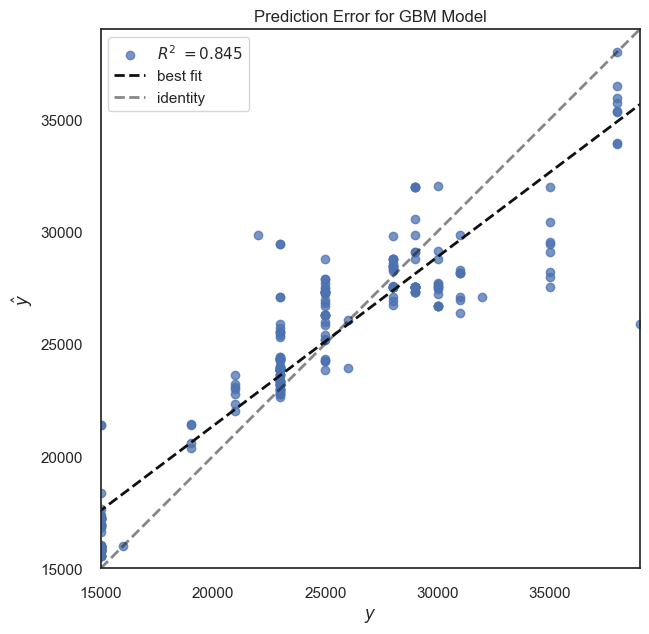

In [57]:
fig, ax = plt.subplots(figsize=(10, 7))
_ = prediction_error(estimator=gbmodel,
                     is_fitted=True,
                     ax=ax,
                     X_train=xtrain,
                     y_train=ytrain,
                     X_test=xtest,
                     y_test=ytest,
                     title="Prediction Error for GBM Model")

## SHAP Analysis for GBM model

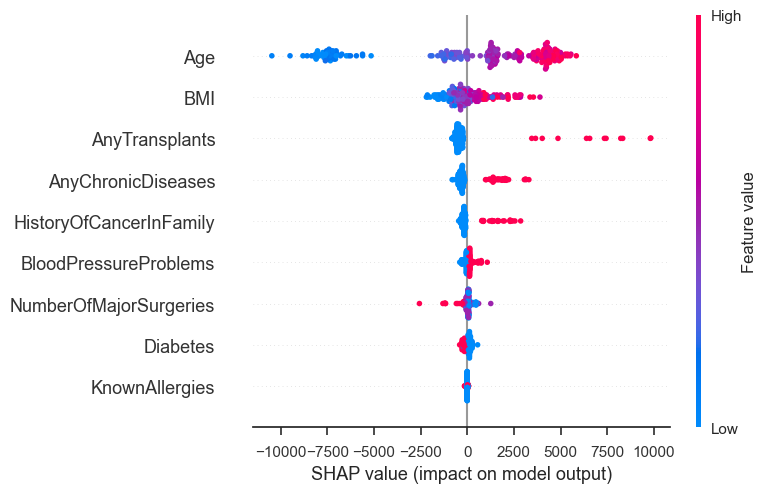

In [58]:
# Shap analysis for RF model
explainer2 = shap.TreeExplainer(gbmodel0)
GBM_shap_values = explainer2.shap_values(xtest)
shap.summary_plot(GBM_shap_values, xtest)

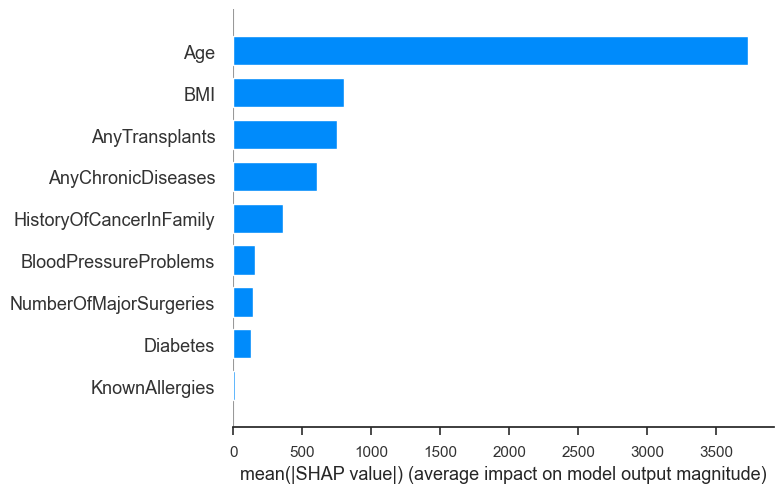

In [59]:
shap.summary_plot(GBM_shap_values, xtest, plot_type="bar")

# XGB Model

In [60]:
import time
import psutil

# Record the start time
start_time = time.time()

# Function to get memory usage
def get_memory_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    return memory_info.rss / (1024 * 1024)  # Convert to megabytes

# Record memory usage before running your code
start_memory = get_memory_usage()

# === Baseline XGB ===
xgmodel0 = XGBRegressor()
xgmodel0.fit(xtrain, ytrain)
ypredtrain4 = xgmodel0.predict(xtrain)
ypredtest4 = xgmodel0.predict(xtest)
print(r2_score(ytrain, ypredtrain4))
print(r2_score(ytest, ypredtest4))
print(cross_val_score(xgmodel0, xsc, y, cv=5).mean())

# === GridSearchCV ===
estimator = XGBRegressor()
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 7, 10],
    'gamma': [0, 0.15, 0.3, 0.5, 1], 
    'learning_rate': [0.1, 0.01, 0.05],
    'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]
}
grid3 = GridSearchCV(estimator, param_grid, scoring="r2", cv=5)
grid3.fit(xtrain, ytrain)
print(grid3.best_params_)

# Use tuned model
xgmodel = grid3
xgmodel.fit(xtrain, ytrain)

ypredtrain4 = xgmodel.predict(xtrain)
ypredtest4 = xgmodel.predict(xtest)

# === Metrics ===
acc_xgb_Train = r2_score(ytrain, ypredtrain4)
print('R^2 Train:', acc_xgb_Train)

acc_xgb_Test = r2_score(ytest, ypredtest4)
print('R^2 Test:', acc_xgb_Test)

acc_xgb_CV = cross_val_score(xgmodel, xsc, y, cv=5).mean()
print('R^2 CV:', acc_xgb_CV)

MAE_xgb_Test = metrics.mean_absolute_error(ytest, ypredtest4)
print('MAE:', MAE_xgb_Test)

MSE_xgb_Test = metrics.mean_squared_error(ytest, ypredtest4)
print('MSE:', MSE_xgb_Test)

RMSE_xgb_Test = np.sqrt(metrics.mean_squared_error(ytest, ypredtest4))
print('RMSE:', RMSE_xgb_Test)

MAPE_xgb_Test = metrics.mean_absolute_percentage_error(ytest, ypredtest4)
print('MAPE:', MAPE_xgb_Test)

# === End timing & memory ===
end_time = time.time()
end_memory = get_memory_usage()

xgb_elapsed_time = end_time - start_time
xgb_memory_used = max(0, end_memory - start_memory)

print(f"Elapsed Time: {xgb_elapsed_time} seconds")
print(f"Memory Used: {xgb_memory_used} MB")

# === Inference time measurement ===
infer_start = time.time()
_ = xgmodel.predict(xtest)
infer_end = time.time()

xgb_inference_time = infer_end - infer_start
xgb_infer_per_sample = (xgb_inference_time / len(xtest)) * 1000  # ms/sample

print(f"Inference Time   : {xgb_inference_time:.4f} sec")
print(f"Per Sample Time  : {xgb_infer_per_sample:.4f} ms")

0.9987348914146423
0.7960810661315918
0.6908774018287659
{'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.6}
R^2 Train: 0.8993680477142334
R^2 Test: 0.8456979990005493
R^2 CV: 0.7512295365333557
MAE: 1583.1695556640625
MSE: 5679032.5
RMSE: 2383.0720719273263
MAPE: 0.06722911447286606
Elapsed Time: 4408.7405734062195 seconds
Memory Used: 148.8984375 MB
Inference Time   : 0.0020 sec
Per Sample Time  : 0.0081 ms


## Learning Curve for XGB model

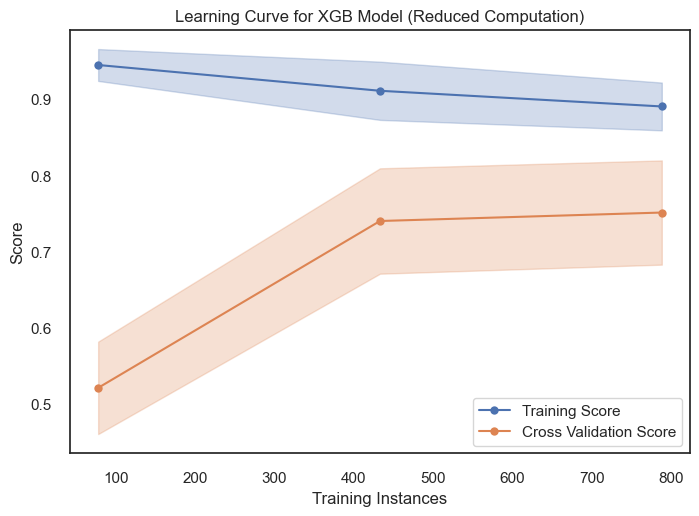

<Axes: title={'center': 'Learning Curve for XGB Model (Reduced Computation)'}, xlabel='Training Instances', ylabel='Score'>

In [61]:
import numpy as np
from yellowbrick.model_selection import LearningCurve

train_sizes = np.linspace(0.1, 1.0, 3)  # fewer training sizes for a faster plot
cv_folds = 3  # fewer CV folds

visualizer = LearningCurve(
    estimator=xgmodel,  # Your trained or base model
    train_sizes=train_sizes,
    cv=cv_folds,
    scoring='r2',
    n_jobs=-1,  # parallel processing to speed up
    title="Learning Curve for XGB Model (Reduced Computation)"
)

visualizer.fit(xsc, y)  # xsc is your feature matrix, y is target
visualizer.show()


## Prediction error plot (yellowbrick) for XGB model

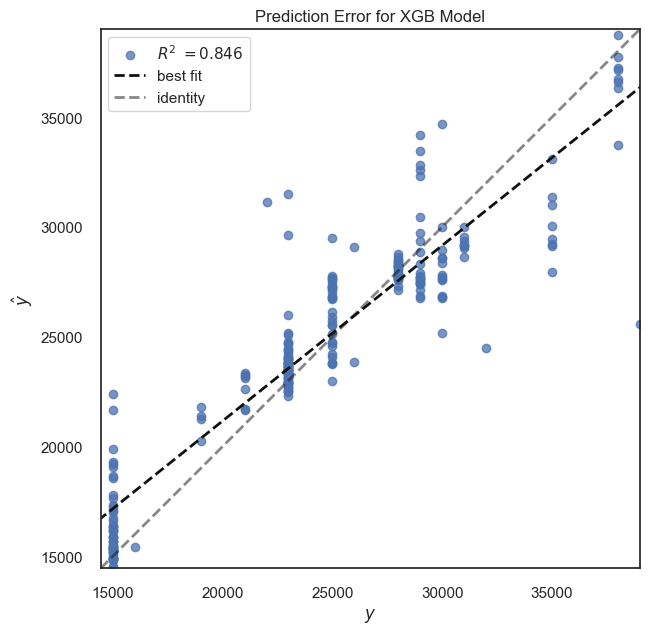

In [62]:
fig, ax = plt.subplots(figsize=(10, 7))
_ = prediction_error(estimator=xgmodel,
                     is_fitted=True,
                     ax=ax,
                     X_train=xtrain,
                     y_train=ytrain,
                     X_test=xtest,
                     y_test=ytest,
                     title="Prediction Error for XGB Model")

## SHAP Analysis for XGB model

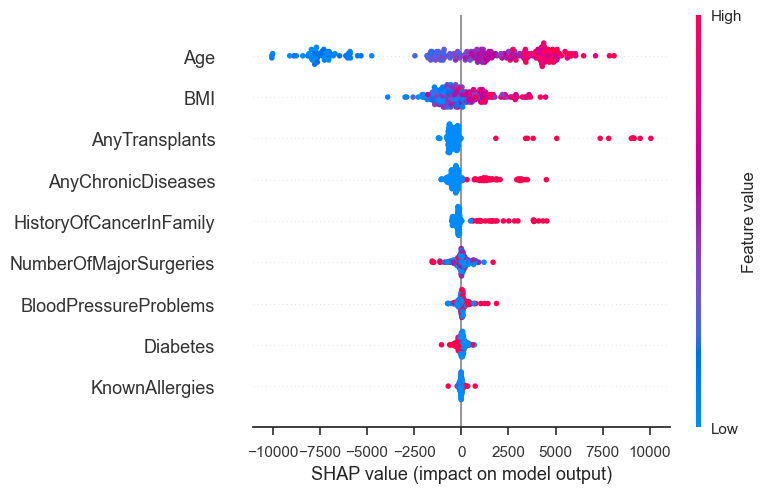

In [63]:
# Shap analysis for RF model
explainer3 = shap.TreeExplainer(xgmodel0)
XGB_shap_values = explainer3.shap_values(xtest)
shap.summary_plot(XGB_shap_values, xtest)

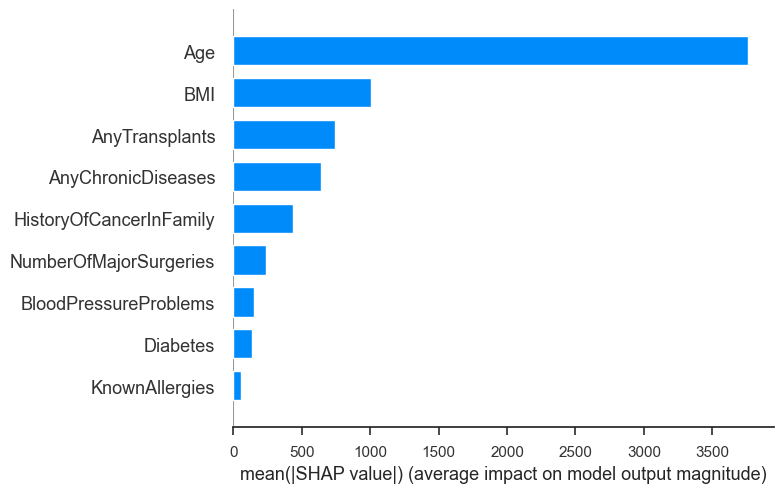

In [64]:
shap.summary_plot(XGB_shap_values, xtest, plot_type="bar")

**CatBoost Regressor**

In [65]:
import time
import psutil
from sklearn.metrics import mean_absolute_percentage_error

# === Memory Usage Function ===
def get_memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / (1024 * 1024)  # in MB

# === Start timing and memory tracking ===
start_time = time.time()
start_memory = get_memory_usage()

# === Baseline CatBoost model ===
cat_model0 = CatBoostRegressor(random_state=41, verbose=0)
cat_model0.fit(xtrain, ytrain)
ypredtrain_cat0 = cat_model0.predict(xtrain)
ypredtest_cat0 = cat_model0.predict(xtest)

print("Initial R² Train:", r2_score(ytrain, ypredtrain_cat0))
print("Initial R² Test:", r2_score(ytest, ypredtest_cat0))
print("Initial CV R²:", cross_val_score(cat_model0, xsc, y, cv=5).mean())

# === GridSearchCV for CatBoost tuning ===
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [6, 8, 10],
    'l2_leaf_reg': [1, 3, 5]
}

grid_cat = GridSearchCV(
    CatBoostRegressor(random_state=41, verbose=0),
    param_grid=param_grid,
    scoring="r2",
    cv=5,
    n_jobs=-1
)
grid_cat.fit(xtrain, ytrain)
print("Best CatBoost Params:", grid_cat.best_params_)

# === Use best estimator and make predictions ===
cat_model = grid_cat.best_estimator_
ypredtrain_cat = cat_model.predict(xtrain)
ypredtest_cat = cat_model.predict(xtest)

# === Evaluation Metrics ===
acc_cat_Train = r2_score(ytrain, ypredtrain_cat)
acc_cat_Test = r2_score(ytest, ypredtest_cat)
acc_cat_CV = cross_val_score(cat_model, xsc, y, cv=5).mean()
MAE_cat_Test = mean_absolute_error(ytest, ypredtest_cat)
MSE_cat_Test = mean_squared_error(ytest, ypredtest_cat)
RMSE_cat_Test = np.sqrt(MSE_cat_Test)
MAPE_cat_Test = mean_absolute_percentage_error(ytest, ypredtest_cat)

# === Resource Usage Statistics ===
end_time = time.time()
end_memory = get_memory_usage()
cat_elapsed_time = end_time - start_time
cat_memory_used = max(0, end_memory - start_memory)

# === Inference Time Calculation ===
infer_start = time.time()
_ = cat_model.predict(xtest)
infer_end = time.time()
cat_inference_time = infer_end - infer_start
cat_infer_per_sample = (cat_inference_time / len(xtest)) * 1000  # in ms/sample

# === Final Output ===
print("\n=== CatBoost Final Evaluation ===")
print(f"R² Train         : {acc_cat_Train:.4f}")
print(f"R² Test          : {acc_cat_Test:.4f}")
print(f"R² CV (5-fold)   : {acc_cat_CV:.4f}")
print(f"MAE              : {MAE_cat_Test:.2f}")
print(f"MSE              : {MSE_cat_Test:.2f}")
print(f"RMSE             : {RMSE_cat_Test:.2f}")
print(f"MAPE             : {MAPE_cat_Test:.4f}")
print(f"Training Time    : {cat_elapsed_time:.2f} seconds")
print(f"Memory Used      : {cat_memory_used:.2f} MB")
print(f"Inference Time   : {cat_inference_time:.4f} sec (Per Sample: {cat_infer_per_sample:.4f} ms)")

Initial R² Train: 0.9463322901455387
Initial R² Test: 0.8185143595807904
Initial CV R²: 0.7303210105188671
Best CatBoost Params: {'depth': 6, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.05}

=== CatBoost Final Evaluation ===
R² Train         : 0.8497
R² Test          : 0.8469
R² CV (5-fold)   : 0.7403
MAE              : 1671.00
MSE              : 5636621.15
RMSE             : 2374.16
MAPE             : 0.0711
Training Time    : 131.09 seconds
Memory Used      : 0.00 MB
Inference Time   : 0.0000 sec (Per Sample: 0.0000 ms)


**Learning Curve for CatBoost**

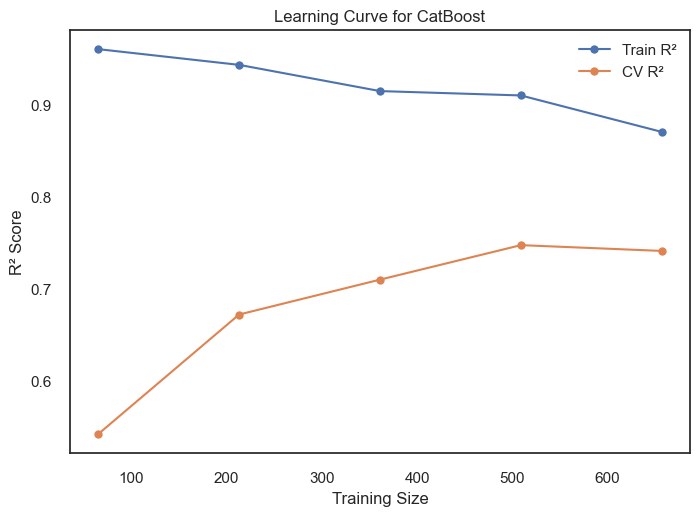

In [66]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    cat_model,
    xsc,
    y,
    cv=3,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring="r2",
    n_jobs=-1
)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label='Train R²')
plt.plot(train_sizes, test_scores_mean, 'o-', label='CV R²')
plt.xlabel("Training Size")
plt.ylabel("R² Score")
plt.title("Learning Curve for CatBoost")
plt.legend()
plt.show()


**Prediction error plot (yellowbrick) for Cat Boost model**

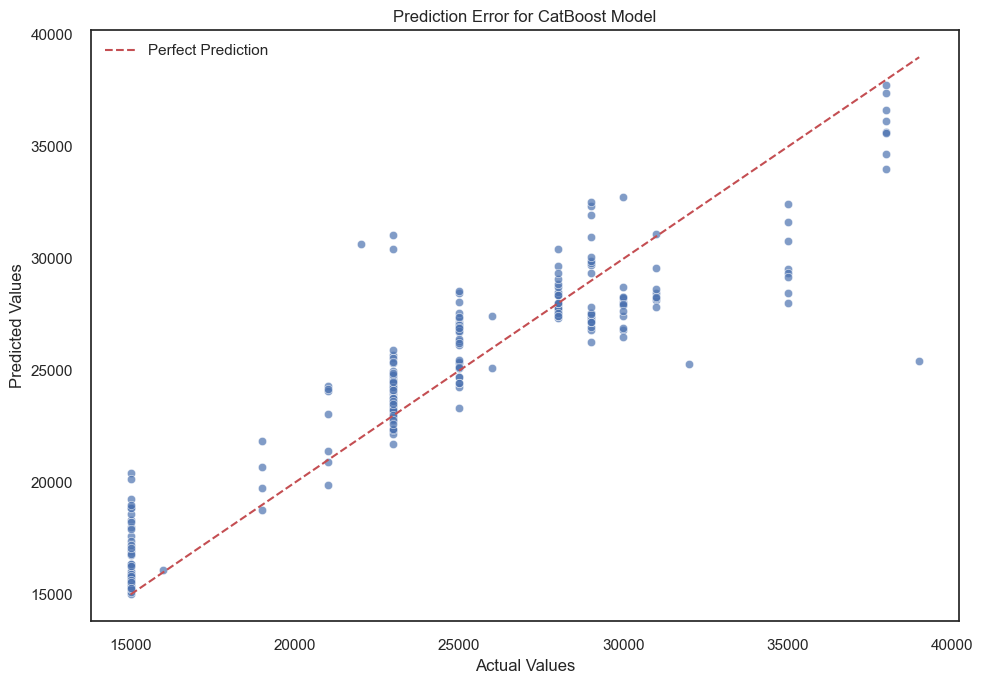

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score

# Make predictions on the test set using your best CatBoost model
y_pred_cat = cat_model.predict(xtest)

# Calculate R^2 for the plot title/legend
r2 = r2_score(ytest, y_pred_cat)

# Create a figure and axes
plt.figure(figsize=(10, 7))

# Plot the scatter points
sns.scatterplot(x=ytest, y=y_pred_cat, alpha=0.6, label=f'$R^2$ = {r2:.3f}')

# Add the Identity Line (y=x)
plt.plot(
    [ytest.min(), ytest.max()],
    [ytest.min(), ytest.max()],
    '--', lw=2, color='gray', label='Identity'
)

# Add the Best Fit Line (regression line)
sns.regplot(
    x=ytest, y=y_pred_cat,
    scatter=False,
    color='black',
    line_kws={'linestyle': '--', 'linewidth': 2},
    ax=plt.gca(),
    label='Best Fit'
)

# Set plot labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction Error for CatBoost Model")
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**SHAP Analysis for Cat Boost model**

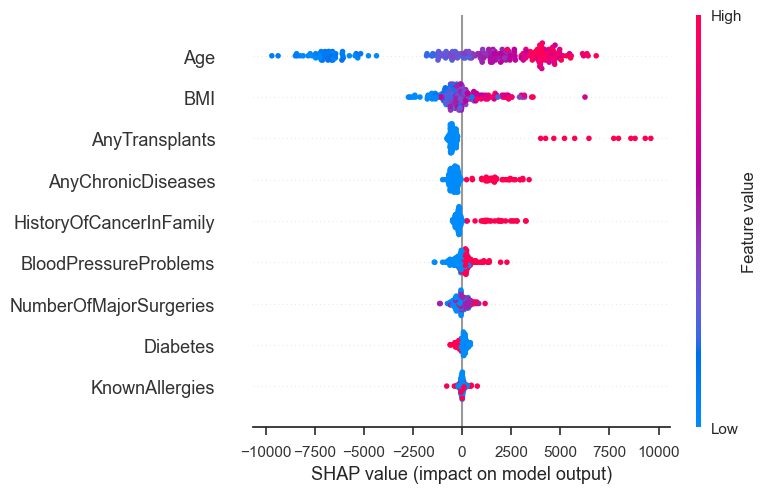

In [68]:
import shap

explainer_cat = shap.Explainer(cat_model0)
cat_shap_values = explainer_cat(xtest)

# SHAP summary plots
shap.summary_plot(cat_shap_values, xtest)

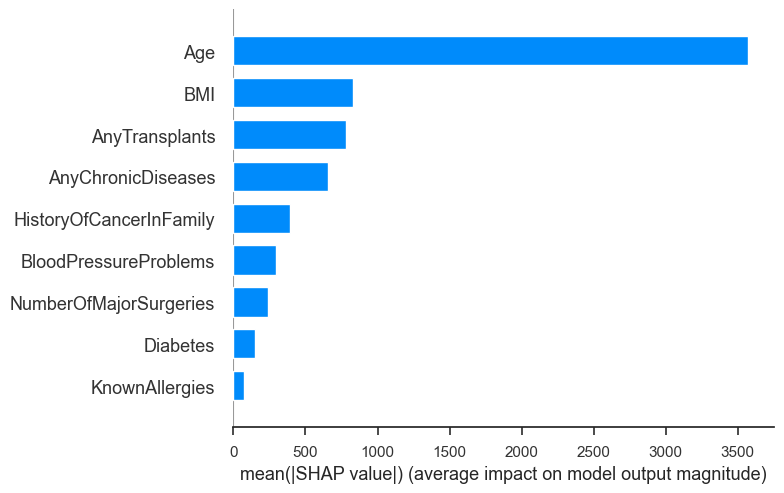

In [69]:
shap.summary_plot(cat_shap_values, xtest, plot_type="bar")

**CatBoost + RF + GBM**

In [70]:
from sklearn.ensemble import StackingRegressor
import time
import psutil

# === Helper function to measure memory ===
def get_memory_usage():
    return psutil.Process().memory_info().rss / (1024 * 1024)

# === Define stacking regressor ===
base_estimators = [
    ('cat', cat_model0),
    ('gbm', gbmodel0),
    ('rf', rfmodel)
]

stacking_reg = StackingRegressor(
    estimators=base_estimators,
    final_estimator=LinearRegression(),
    passthrough=False,
    n_jobs=-1
)

# === Measure training time and memory ===
start_time = time.time()
start_memory = get_memory_usage()

stacking_reg.fit(xtrain, ytrain)

end_time = time.time()
end_memory = get_memory_usage()

stack_elapsed_time = end_time - start_time
stack_memory_used = end_memory - start_memory

# === Generate predictions ===
y_pred_train_stack = stacking_reg.predict(xtrain)
y_pred_test_stack = stacking_reg.predict(xtest)

# === Inference time measurement (test set) ===
infer_start = time.time()
_ = stacking_reg.predict(xtest)
infer_end = time.time()

stack_inference_time = infer_end - infer_start
stack_infer_per_sample = (stack_inference_time / len(xtest)) * 1000  # in milliseconds

# === Evaluation metrics ===
acc_stack_Train = r2_score(ytrain, y_pred_train_stack)
acc_stack_Test = r2_score(ytest, y_pred_test_stack)
acc_stack_CV = cross_val_score(stacking_reg, xsc, y, cv=5).mean()

MAE_stack_Test = mean_absolute_error(ytest, y_pred_test_stack)
RMSE_stack_Test = np.sqrt(mean_squared_error(ytest, y_pred_test_stack))
MAPE_stack_Test = mean_absolute_percentage_error(ytest, y_pred_test_stack)

# === Display stacked model results ===
print("\n=== Stacking Ensemble (CatBoost + GBM + RF) Performance ===")
print(f"R² Train         : {acc_stack_Train:.4f}")
print(f"R² Test          : {acc_stack_Test:.4f}")
print(f"R² CV (5-fold)   : {acc_stack_CV:.4f}")
print(f"MAE              : {MAE_stack_Test:.2f}")
print(f"RMSE             : {RMSE_stack_Test:.2f}")
print(f"MAPE             : {MAPE_stack_Test:.4f}")
print(f"Training Time    : {stack_elapsed_time:.2f} seconds")
print(f"Memory Used      : {stack_memory_used:.2f} MB")
print(f"Inference Time   : {stack_inference_time:.4f} sec (Per Sample: {stack_infer_per_sample:.4f} ms)")


=== Stacking Ensemble (CatBoost + GBM + RF) Performance ===
R² Train         : 0.9302
R² Test          : 0.8543
R² CV (5-fold)   : 0.7365
MAE              : 1490.97
RMSE             : 2315.70
MAPE             : 0.0631
Training Time    : 28.80 seconds
Memory Used      : -6.82 MB
Inference Time   : 0.0160 sec (Per Sample: 0.0647 ms)


**Learning Curve for Stacking Regressor(CatBoost + RF + GBM)**

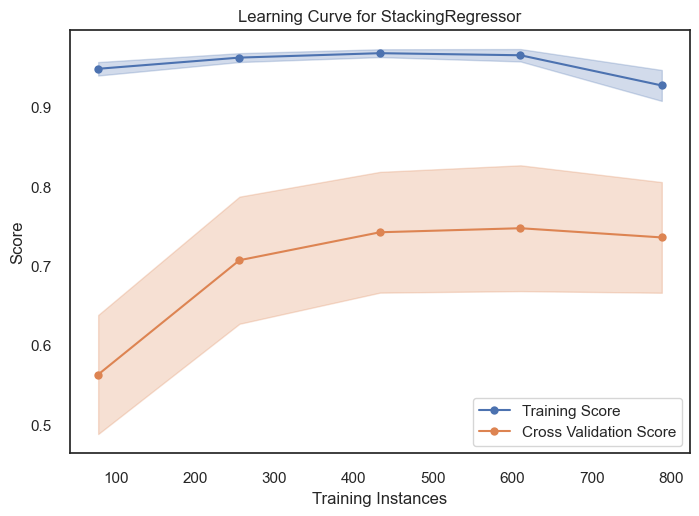

<Axes: title={'center': 'Learning Curve for StackingRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [71]:
from yellowbrick.model_selection import LearningCurve
import matplotlib.pyplot as plt

# Create the LearningCurve visualizer
viz = LearningCurve(
    estimator=stacking_reg,
    scoring='r2',            # or use another metric as needed
    train_sizes=np.linspace(0.1, 1.0, 5),  # 5 increments from 10% to 100%
    cv=5,                    # 5-fold cross-validation to match your script
    n_jobs=-1                # Use all processors
)

# Fit visualizer using all training data (scaled if used for CV)
viz.fit(xsc, y)
viz.show()


**Prediction Error Plot**

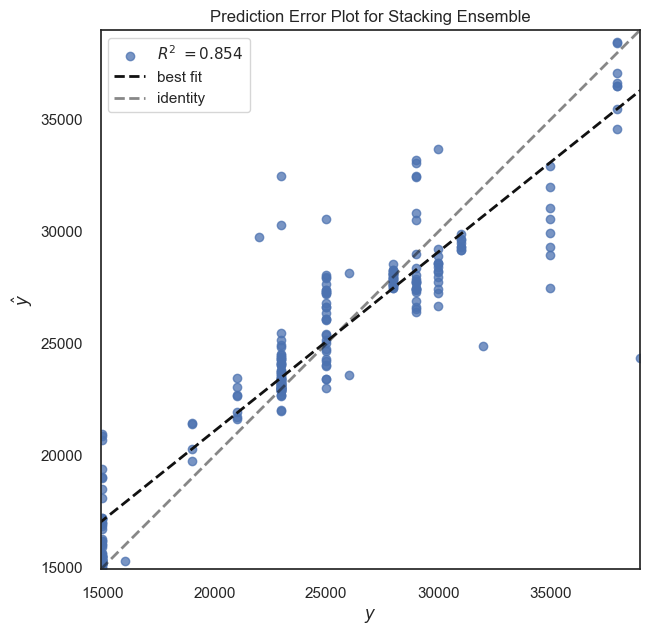

In [72]:
from yellowbrick.regressor import prediction_error
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 7))
prediction_error(
    estimator=stacking_reg,
    is_fitted=True,
    ax=ax,
    X_train=xtrain,
    y_train=ytrain,
    X_test=xtest,
    y_test=ytest,
    title="Prediction Error Plot for Stacking Ensemble"
)
plt.show()


**SHAP Analysis for stacking ensemble(CatBoost + RF + GBM) model**

  0%|          | 0/100 [00:00<?, ?it/s]

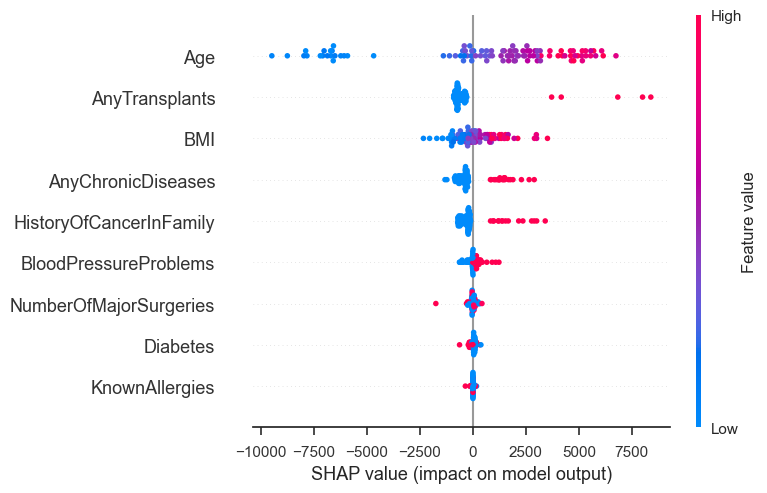

In [73]:
import shap

# Use a small subset for background data to keep computations reasonable
background_data = xtrain.sample(n=min(100, len(xtrain)), random_state=1)

# Likewise, use a manageable sample from the test set for explanation
X_shap = xtest.sample(n=min(100, len(xtest)), random_state=1)

# Build the KernelExplainer for your stacking ensemble
explainer_stack = shap.KernelExplainer(stacking_reg.predict, background_data)

# This step can take a while, depending on the background/sample size
stack_shap_values = explainer_stack.shap_values(X_shap)

# SHAP summary plot (beeswarm)
shap.summary_plot(stack_shap_values, X_shap, show=True)


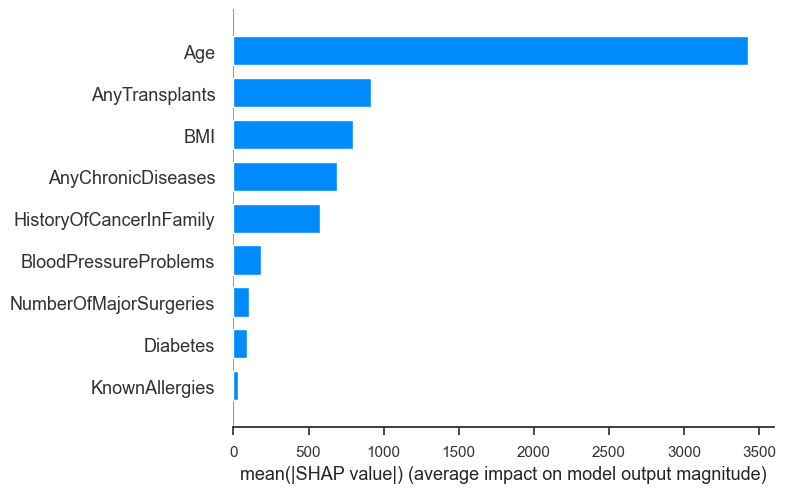

In [74]:
# SHAP bar plot (mean |SHAP value| per feature)
shap.summary_plot(stack_shap_values, X_shap, plot_type="bar", show=True)

**XGB + Catboost**

In [75]:
from sklearn.ensemble import StackingRegressor
import time
import psutil

# = Memory Usage Function =
def get_memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / (1024 * 1024)  # in MB

# = Base Estimators for Stacking =
base_estimators_cb_xgb = [
    ('catboost', cat_model),
    ('xgboost', xgmodel)
]

# = Define the Stacking Regressor =
stacking_cb_xgb_reg = StackingRegressor(
    estimators=base_estimators_cb_xgb,
    final_estimator=LinearRegression(),
    passthrough=False,
    n_jobs=-1
)

# ===== Training Start (Time & Memory) =====
start_time_cb_xgb = time.time()
start_memory_cb_xgb = get_memory_usage()

# Train the model
stacking_cb_xgb_reg.fit(xtrain, ytrain)

# Predictions
y_pred_train_cb_xgb = stacking_cb_xgb_reg.predict(xtrain)
y_pred_test_cb_xgb = stacking_cb_xgb_reg.predict(xtest)

# ===== End Time & Memory =====
end_time_cb_xgb = time.time()
end_memory_cb_xgb = get_memory_usage()

# ===== Metrics =====
r2_train_cb_xgb = r2_score(ytrain, y_pred_train_cb_xgb)
r2_test_cb_xgb = r2_score(ytest, y_pred_test_cb_xgb)
# Reduced folds from 5 to 3 for speed
r2_cv_cb_xgb = cross_val_score(stacking_cb_xgb_reg, xsc, y, cv=3, n_jobs=-1).mean()

mae_cb_xgb = mean_absolute_error(ytest, y_pred_test_cb_xgb)
rmse_cb_xgb = np.sqrt(mean_squared_error(ytest, y_pred_test_cb_xgb))
mape_cb_xgb = mean_absolute_percentage_error(ytest, y_pred_test_cb_xgb)

# Training resource usage
elapsed_time_cb_xgb = end_time_cb_xgb - start_time_cb_xgb
memory_used_cb_xgb = max(0, end_memory_cb_xgb - start_memory_cb_xgb)

# ===== Inference Time =====
start_infer_time = time.time()
_ = stacking_cb_xgb_reg.predict(xtest)
end_infer_time = time.time()

inference_total_time_cb_xgb = end_infer_time - start_infer_time
infer_per_sample_time_cb_xgb = (inference_total_time_cb_xgb / len(xtest)) * 1000  # ms/sample

# ===== Final Report =====
print("\n= Stacking Ensemble (CatBoost + XGBoost) Performance =")
print(f"R² Train       : {r2_train_cb_xgb:.4f}")
print(f"R² Test        : {r2_test_cb_xgb:.4f}")
print(f"R² CV (3-fold) : {r2_cv_cb_xgb:.4f}")
print(f"MAE            : {mae_cb_xgb:.2f}")
print(f"RMSE           : {rmse_cb_xgb:.2f}")
print(f"MAPE           : {mape_cb_xgb:.4f}")
print(f"Training Time  : {elapsed_time_cb_xgb:.2f} seconds")
print(f"Memory Used    : {memory_used_cb_xgb:.2f} MB")
print(f"Inference Time : {inference_total_time_cb_xgb:.4f} sec (Per Sample: {infer_per_sample_time_cb_xgb:.4f} ms)")


= Stacking Ensemble (CatBoost + XGBoost) Performance =
R² Train       : 0.8857
R² Test        : 0.8543
R² CV (3-fold) : 0.7589
MAE            : 1549.98
RMSE           : 2316.00
MAPE           : 0.0644
Training Time  : 1882.03 seconds
Memory Used    : 0.00 MB
Inference Time : 0.0177 sec (Per Sample: 0.0717 ms)


**Learning Curve for Stacking Regressor(XGB + Catboost)**

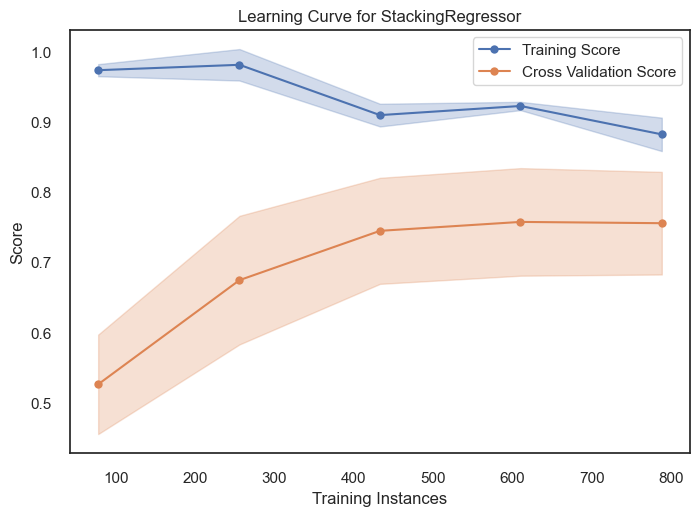

<Axes: title={'center': 'Learning Curve for StackingRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [76]:
from yellowbrick.model_selection import LearningCurve
import matplotlib.pyplot as plt
import numpy as np

# Create the LearningCurve visualizer
viz = LearningCurve(
    estimator=stacking_cb_xgb_reg,                  # your stacking ensemble model
    scoring='r2',                            # or another suitable metric
    train_sizes=np.linspace(0.1, 1.0, 5),    # 5 increments from 10% to 100%
    cv=3,                                    # 5-fold cross-validation
    n_jobs=-1                                # use all available processors
)

# Fit the visualizer using your preprocessed/scaled training data
viz.fit(xsc, y)
viz.show()


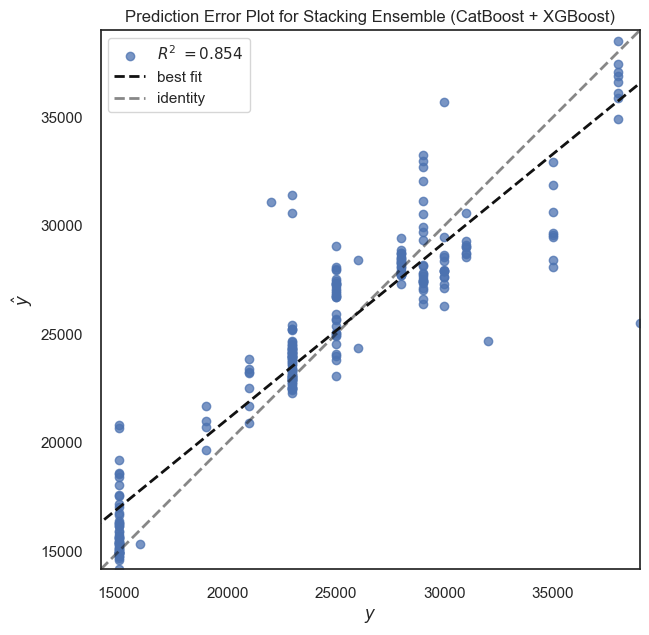

In [77]:
from yellowbrick.regressor import prediction_error
import matplotlib.pyplot as plt

# It's important to pass both the training and testing data for the plot.
# The `is_fitted=True` argument tells Yellowbrick not to retrain the model,
# but just to use it for plotting.
fig, ax = plt.subplots(figsize=(10, 7))
prediction_error(
    estimator=stacking_cb_xgb_reg,
    is_fitted=True,
    ax=ax,
    X_train=xtrain,
    y_train=ytrain,
    X_test=xtest,
    y_test=ytest,
    title="Prediction Error Plot for Stacking Ensemble (CatBoost + XGBoost)"
)
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

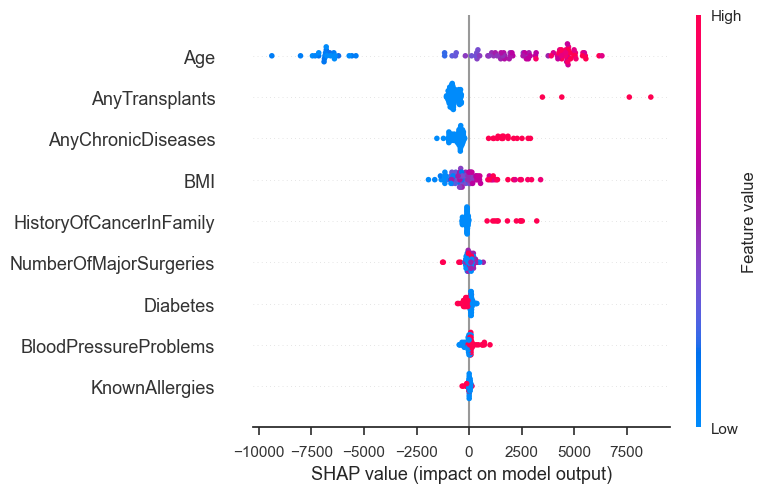

In [78]:
import shap

# Use a subset of train data for SHAP background (makes KernelExplainer faster)
background_data = xtrain.sample(n=min(100, len(xtrain)), random_state=42)

# Use a manageable subset of the test data for explanation
X_shap = xtest.sample(n=min(100, len(xtest)), random_state=42)

# Build the SHAP KernelExplainer for the stacking ensemble
explainer_stack = shap.KernelExplainer(stacking_cb_xgb_reg.predict, background_data)

# Compute SHAP values for your selected test samples
shap_values = explainer_stack.shap_values(X_shap)

# Summary plot (beeswarm): shows impact of each feature on ensemble predictions
shap.summary_plot(shap_values, X_shap)


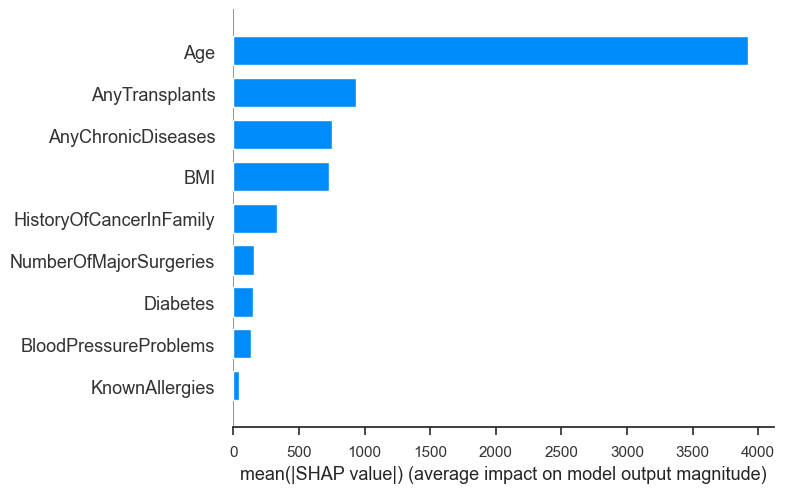

In [79]:
# Summary plot (bar): mean absolute SHAP values for ranking feature importance
shap.summary_plot(shap_values, X_shap, plot_type="bar")

# Final Result

In [80]:
models = pd.DataFrame({
    'Model': [
        'RF Model', 'GBM Model', 'XGB Model', 'CatBoost Model',
        'Stacking Ensemble', 'Stacking (CatBoost + XGB)'
    ],
    'Train Score': [
        acc_RF_Train*100, acc_GBM_Train*100, acc_xgb_Train*100, acc_cat_Train*100,
        acc_stack_Train*100, r2_train_cb_xgb*100
    ],
    'Test Score': [
        acc_RF_Test*100, acc_GBM_Test*100, acc_xgb_Test*100, acc_cat_Test*100,
        acc_stack_Test*100, r2_test_cb_xgb*100
    ],
    'CV Score': [
        acc_RF_CV*100, acc_GBM_CV*100, acc_xgb_CV*100, acc_cat_CV*100,
        acc_stack_CV*100, r2_cv_cb_xgb*100
    ],
})

print("Models (R2 Scores):")
models.sort_values(by='Test Score', ascending=False)


Models (R2 Scores):


,Model,Train Score,Test Score,CV Score
4,Stacking Ensemble,93.024,85.430,73.652
5,Stacking (CatBoost + XGB),88.566,85.426,75.890
3,CatBoost Model,84.974,84.685,74.033
2,XGB Model,89.937,84.570,75.123
1,GBM Model,79.492,84.504,72.587
0,RF Model,95.803,84.122,73.435


In [81]:
models_detailed = pd.DataFrame({
    'Model': [
        'RF Model', 'GBM Model', 'XGB Model', 'CatBoost Model',
        'Stacking Ensemble', 'Stacking (CatBoost + XGB)'
    ],
    'Train Score': [
        acc_RF_Train*100, acc_GBM_Train*100, acc_xgb_Train*100, acc_cat_Train*100,
        acc_stack_Train*100, r2_train_cb_xgb*100
    ],
    'Test Score': [
        acc_RF_Test*100, acc_GBM_Test*100, acc_xgb_Test*100, acc_cat_Test*100,
        acc_stack_Test*100, r2_test_cb_xgb*100
    ],
    'CV Score': [
        acc_RF_CV*100, acc_GBM_CV*100, acc_xgb_CV*100, acc_cat_CV*100,
        acc_stack_CV*100, r2_cv_cb_xgb*100
    ],
    'MAE Score': [
        MAE_RF_Test, MAE_GBM_Test, MAE_xgb_Test, MAE_cat_Test,
        MAE_stack_Test, mae_cb_xgb
    ],
    'RMSE Score': [
        RMSE_RF_Test, RMSE_GBM_Test, RMSE_xgb_Test, RMSE_cat_Test,
        RMSE_stack_Test, rmse_cb_xgb
    ],
    'MAPE Score (%)': [
        MAPE_RF_Test*100, MAPE_GBM_Test*100, MAPE_xgb_Test*100, MAPE_cat_Test*100,
        MAPE_stack_Test*100, mape_cb_xgb*100
    ],
    'Elapsed Time (Sec)': [
        RF_elapsed_time, GBM_elapsed_time, xgb_elapsed_time, cat_elapsed_time,
        stack_elapsed_time, elapsed_time_cb_xgb
    ],
    'Memory Used (MB)': [
        RF_memory_used, GBM_memory_used, xgb_memory_used, cat_memory_used,
        stack_memory_used, memory_used_cb_xgb
    ],
    'Inference Time (Sec)': [
        RF_inference_time, GBM_inference_time, xgb_inference_time, cat_inference_time,
        stack_inference_time, inference_total_time_cb_xgb
    ],
    'Inference Time Per Sample (ms)': [
        RF_infer_per_sample, GBM_infer_per_sample, xgb_infer_per_sample, cat_infer_per_sample,
        stack_infer_per_sample, infer_per_sample_time_cb_xgb
    ]
})

print("\nDetailed Models Comparison:")
models_detailed.sort_values(by='Test Score', ascending=False)



Detailed Models Comparison:


,Model,Train Score,Test Score,CV Score,MAE Score,RMSE Score,MAPE Score (%),Elapsed Time (Sec),Memory Used (MB),Inference Time (Sec),Inference Time Per Sample (ms)
4,Stacking Ensemble,93.024,85.430,73.652,1490.974,2315.702,6.312,28.804,-6.824,0.016,0.065
5,Stacking (CatBoost + XGB),88.566,85.426,75.890,1549.980,2316.004,6.441,1882.030,0.000,0.018,0.072
3,CatBoost Model,84.974,84.685,74.033,1671.002,2374.157,7.110,131.094,0.000,0.000,0.000
2,XGB Model,89.937,84.570,75.123,1583.170,2383.072,6.723,4408.741,148.898,0.002,0.008
1,GBM Model,79.492,84.504,72.587,1741.199,2388.152,7.305,82.710,0.000,0.000,0.000
0,RF Model,95.803,84.122,73.435,1378.432,2417.387,5.815,63.274,0.000,0.031,0.127
